Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.1}
Best score achieved: 0.09221018511233744
Root Mean Squared Error with the best Gradient Boosting: 4.301016017256167e-06


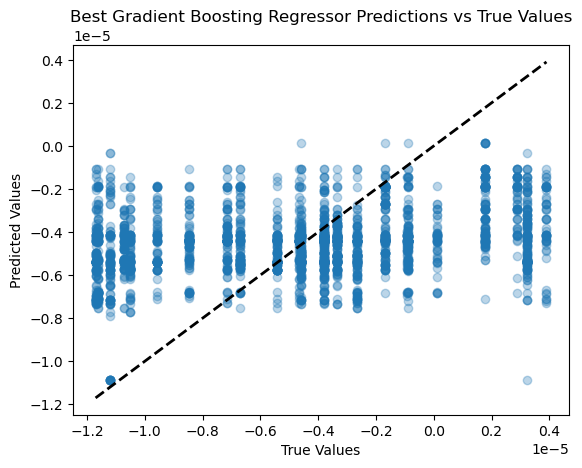

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the result data
result_data = pd.read_excel(r"C:\Users\austa\Downloads\FMAP01\Result.xlsx", usecols=['Correct_Indentation'])

# Initialize an empty list to store DataFrames
data_frames = []
y = []  # This will be our target variable list

# Loop through each test data file and store in list
for i in range(1, 26):
    file_path = rf"C:\Users\austa\Downloads\FMAP01\testdata_{i}.csv"
    df = pd.read_csv(file_path)
    data_frames.append(df)
    
    # Here, we extend the y list with the correct indentation value for each row in df
    correct_indentation = result_data.loc[i-1, 'Correct_Indentation']  # Assumes order in result_data matches the CSV files
    y.extend([correct_indentation] * len(df))

# Concatenate all DataFrames from the list
all_test_data = pd.concat(data_frames, ignore_index=True)

# Convert y to a numpy array
y = np.array(y)

# Ensure all_test_data only contains the 'Force_Ext' for features
X = all_test_data[['Force_Ext']].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_dist_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV with a GradientBoostingRegressor
random_search_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist_gbr,
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the data
random_search_gbr.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {random_search_gbr.best_params_}")
print(f"Best score achieved: {random_search_gbr.best_score_}")

# Use the best estimator to make predictions
best_gbr = random_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print(f'Root Mean Squared Error with the best Gradient Boosting: {rmse_gbr}')

# Plot the true vs predicted values to visually inspect the performance
plt.scatter(y_test, y_pred_gbr, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Best Gradient Boosting Regressor Predictions vs True Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.show()
